In [163]:
import pandas as pd

In [343]:
customer_data = pd.read_csv('../data/Customer Data Set - Student 1 of 3.csv')
customer_data.head(6)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single
5,10006,1,63,"$132,893",1,notenrolled,NaN,4,Married


In [165]:
product_data = pd.read_csv('../data/Product Data Set - Student 2 of 3.csv', sep = '|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [166]:
transaction_data = pd.read_csv('../data/Transaction Data Set - Student 3 of 3.csv', sep = '|')
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


## Data quality

clean the data

In [167]:
product_data['UNIT LIST PRICE'] = product_data['UNIT LIST PRICE'].map(lambda x: float(x.replace('$','')))

In [168]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$', ''))
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x.replace(',','')))

In [169]:
# check for null values in all datasets
print(product_data.isnull().values.any())
print(transaction_data.isnull().values.any())
print(customer_data.isnull().values.any())

False
False
True


In [170]:
customer_data.columns[customer_data.isna().any()].to_list()

['ENROLLMENT DATE']

In [171]:
# replace all NaN values with 0
customer_data['ENROLLMENT DATE'] = customer_data['ENROLLMENT DATE'].fillna(0)

In [172]:
# combine tables that will give more information when combined
trans_products = transaction_data.merge(product_data, how = 'inner', left_on = 'PRODUCT NUM', right_on='PRODUCT CODE')
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


In [173]:
trans_products['TOTAL BOUGHT'] = trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1-trans_products['DISCOUNT TAKEN'])
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL BOUGHT
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


**There were two important objectives that were set during the business understanding phase:**
    1. understanding the factors associated with the loyalty participation.
    2. understanding the factors associated with increased spending.
       

In [174]:
# finding out retailer's X best sellers
best_sellers = trans_products.groupby('PRODUCT CATEGORY').agg({'TOTAL BOUGHT': 'sum'}).sort_values('TOTAL BOUGHT', ascending = False)
best_sellers

,TOTAL BOUGHT
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In retailer X's shop, elctronics sell best and Health and Beauty sell the worst.

In [175]:
# creating a table that will tell us more about our customers:
customer_prod_category = trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'TOTAL BOUGHT': 'sum'})
customer_prod_category[:10]

TOTAL BOUGHT
CUSTOMER NUM PRODUCT CATEGORY              
10001        APPAREL               4022.430
             ELECTRONICS           1601.315
             FOOD                    68.688
             HEALTH & BEAUTY       1134.337
10002        APPAREL               2312.509
             ELECTRONICS           2473.163
             FOOD                   276.779
10003        APPAREL               2887.382
             ELECTRONICS           5414.418
             FOOD                   260.640

In [176]:
customer_prod_category = customer_prod_category.reset_index()
customer_prod_category.head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL BOUGHT
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [316]:
# reorganize as per customer
customer_pivot = customer_prod_category.pivot(index='CUSTOMER NUM', columns='PRODUCT CATEGORY', values = 'TOTAL BOUGHT')
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [317]:
customer_pivot = customer_pivot.fillna(0)
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,0.000
10003,2887.382,5414.418,260.640,0.000
10004,3637.213,1840.211,45.270,0.000
10005,213.512,0.000,0.000,0.000


Business understanding

Data understanding

Data preparation, we're combining tables that will help us work better and create an ultimate table or ultimate tables. 

Modelling

Evaluation 

Feedback/Report on way forward

In [398]:
# look for the table with customer num and experience, group according to customer create a column for experience, merge the two, or just separate experience and add to thos table and also income
customer_experience = customer_data[['CUSTOMERID','EXPERIENCE SCORE']]
customer_experience = customer_pivot.merge(customer_experience, left_on="CUSTOMER NUM", right_on='CUSTOMERID')
customer_experience = customer_experience.reindex(['CUSTOMERID','APPAREL','ELECTRONICS','FOOD','HEALTH & BEAUTY', 'EXPERIENCE SCORE'], axis = 1)
customer_experience[customer_experience['EXPERIENCE SCORE']<5].shape

(87, 6)

Out of 500 customers only 87 had a bad experience in the store. This bad experience is said to be driven by the lack of adequate stock.

In [399]:
low_customer_experience = customer_experience[customer_experience['EXPERIENCE SCORE']< 5]
low_customer_experience.head()

,CUSTOMERID,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,EXPERIENCE SCORE
4,10005,213.512,0.000,0.000,0.000,3
5,10006,1448.330,2785.763,720.379,280.375,1
9,10010,2385.751,4149.670,84.726,0.000,2
11,10012,293.100,0.000,0.000,0.000,2
13,10014,2735.990,3926.990,35.210,0.000,1


In [400]:
# calculate transaction per customer:
customer_total_spent = trans_products.groupby('CUSTOMER NUM').agg({'TOTAL BOUGHT': 'sum'})
customer_total_spent.head()

,TOTAL BOUGHT
CUSTOMER NUM,
10001,6826.770
10002,5062.451
10003,8562.440
10004,5522.694
10005,213.512


In [401]:
low_customer_experience = low_customer_experience.merge(customer_total_spent, left_on = 'CUSTOMERID', right_index = True)
low_customer_experience.head()

,CUSTOMERID,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,EXPERIENCE SCORE,TOTAL BOUGHT
4,10005,213.512,0.000,0.000,0.000,3,213.512
5,10006,1448.330,2785.763,720.379,280.375,1,5234.847
9,10010,2385.751,4149.670,84.726,0.000,2,6620.147
11,10012,293.100,0.000,0.000,0.000,2,293.100
13,10014,2735.990,3926.990,35.210,0.000,1,6698.190


In [412]:
most_bought = trans_products.groupby('PRODUCT CATEGORY').agg({'QUANTITY PURCHASED': 'sum', 'TOTAL BOUGHT': 'sum'})
most_bought

,QUANTITY PURCHASED,TOTAL BOUGHT
PRODUCT CATEGORY,,
APPAREL,36568,936757.914
ELECTRONICS,32814,1607192.422
FOOD,20144,96044.610
HEALTH & BEAUTY,8872,54776.312


Apparel is bought in the largest amount therefore should be adequately stocked, followed by electronics, food and last health and beauty.

In [180]:
# create a table that each customer alongside what they bought in each category and how much they've spent in total.
customer_transactions = customer_pivot.merge(customer_total_spent, how = 'inner', left_index=True, right_index=True)
customer_transactions = customer_transactions.rename(columns = {'TOTAL BOUGHT':'TOTAL SPENT'})
customer_transactions.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,0.000,5062.451
10003,2887.382,5414.418,260.640,0.000,8562.440
10004,3637.213,1840.211,45.270,0.000,5522.694
10005,213.512,0.000,0.000,0.000,213.512


In [181]:
# combine customer data table with customer transactions to get a wider view.
customer_all_view = customer_data.merge(customer_transactions, left_on='CUSTOMERID', right_index = True)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512





Now proceed to explore what causes loyalty and increased spending in retailer X's store.


### Loyalty analysis

In [182]:
loyalty_table = pd.crosstab(customer_all_view['GENDER'], customer_all_view['LOYALTY GROUP'])
loyalty_table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


In [183]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loyalty group vs Gender')

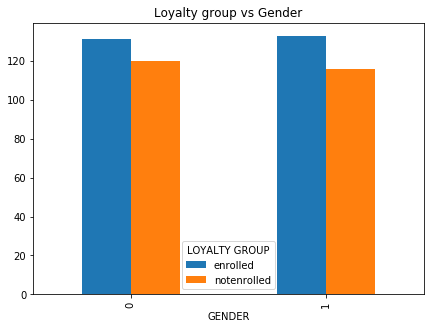

In [184]:
loyalty_table.plot(kind = 'bar', figsize = (7,5))
plt.title("Loyalty group vs Gender")

Gender doesn't seem to affect loyalty at all, we have almost as many people enrolled as not enrolled in both genders.

Text(0.5, 1.0, 'Loyalty group vs age')

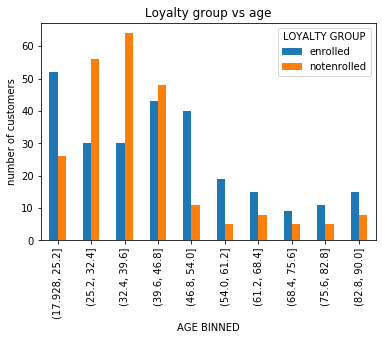

In [185]:
# Age vs Loyalty
# since age is a continuous variable, put them in bins/categories.
customer_all_view['AGE BINNED'] = pd.cut(customer_all_view['AGE'], 10)
loyalty_table = pd.crosstab(customer_all_view['AGE BINNED'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.ylabel('number of customers')
plt.title("Loyalty group vs age")

customers between the ages of 25.2 to 46.8 seem not to be interested in the loyalty program. This is seen from the higher number or 'not enrolled' people compared to those 'enrolled' in that age group. Age is therefore a factor that affects loyalty.

Text(0.5, 1.0, 'Income vs Age')

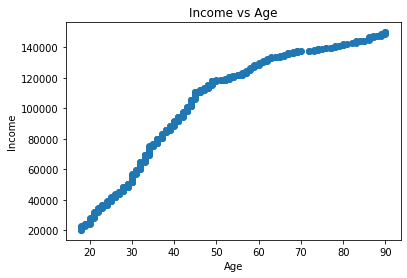

In [186]:
plt.scatter(customer_all_view['AGE'], customer_all_view['INCOME'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Income vs Age")

Income and age are positively correlated, almost one and the same, we can assume that income and age will have the same relationship with loyalty.

Text(0.5, 1.0, 'Loyalty Group vs Experience score')

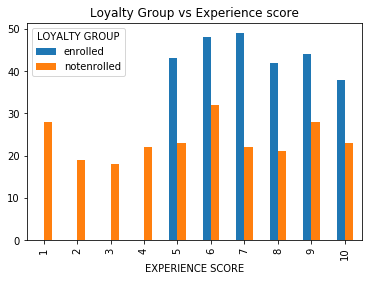

In [187]:
# Experience score vs loyalty
loyalty_table = pd.crosstab(customer_all_view['EXPERIENCE SCORE'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.title("Loyalty Group vs Experience score")

Experience does affect loyalty. The better the experience in the store, i.e. 5 and above, the more the likelihood to be enrolled to the loyalty program

Text(0.5, 1.0, 'Loyalty group vs Household size')

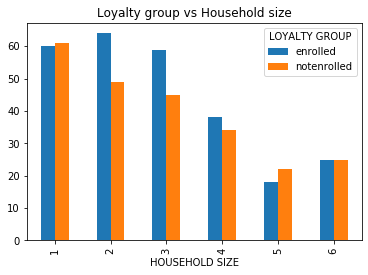

In [188]:
# household size vs loyalty 
loyalty_table = pd.crosstab(customer_all_view['HOUSEHOLD SIZE'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.title("Loyalty group vs Household size")

customers whose household size is between 2 and 4 appear to be more interested in the loyalty program compared to other household sizes(1,5,6) who are indifferent.

Text(0.5, 1.0, 'Loyalty group vs Marital status')

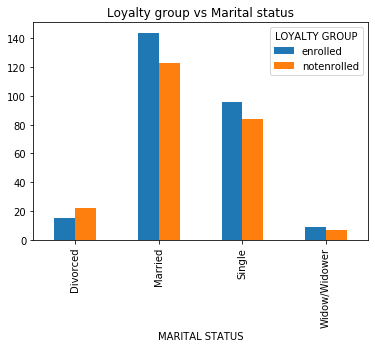

In [189]:
# marital status vs loyalty 
loyalty_table = pd.crosstab(customer_all_view['MARITAL STATUS'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.title("Loyalty group vs Marital status")

There's a small realtionship, small to mean almost indifferent. Customer who are married, single and widowed are more likely to enroll in the loyalty program. Divorced customers are more likely to not enroll in the loyalty program.

Text(0.5, 1.0, 'Loyalty group vs Total spent')

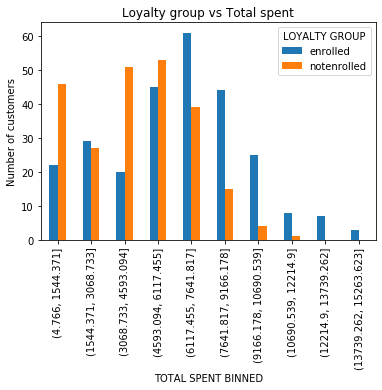

In [359]:
# total spent vs loyalty
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10)
loyalty_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.ylabel("Number of customers")
plt.title("Loyalty group vs Total spent")

Those who spend more enroll more. This is supported by the observation that those who spend above $6117.46 have higher numbers of customers enrolled to the loyalty program, compared to those not enrolled.

### Factors affecting spending

Text(0.5, 1.0, 'Total spent vs Gender')

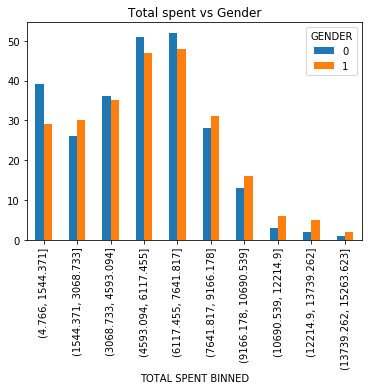

In [191]:
# gender vs total spent
spending_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['GENDER'])
spending_table.plot(kind = 'bar')
plt.title("Total spent vs Gender")

Gender shows no clear relationship between spending and being male or female.In 4/10 of the bins gender 0 spent more in 6/10 gender 1 spent more so from the above chart we cannot say that being of gender 0 or 1 will determine how much you'll spend in general.

Text(0.5, 1.0, 'Total spent vs Income')

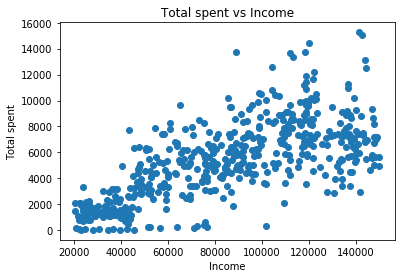

In [192]:
# income vs Total spent. Income is continuous hence we use a scatterplot
plt.scatter(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total spent")
plt.title("Total spent vs Income")

In [193]:
# measure correlation using pearson correlation.
from scipy.stats import pearsonr
pearsonr(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])

(0.6880311084625118, 2.3226326963807324e-71)

0.688 is an indication of a strong positive correlation; which then means as income increases so does spending. Income is a factor that affects spending.

In [194]:
pearsonr(customer_all_view['AGE'], customer_all_view['INCOME'])

(0.9417989049786017, 6.452902105194393e-238)

The relationship between age and income is very strong as proven by the pearson correlation.

Text(0.5, 1.0, 'Total Spent vs Age')

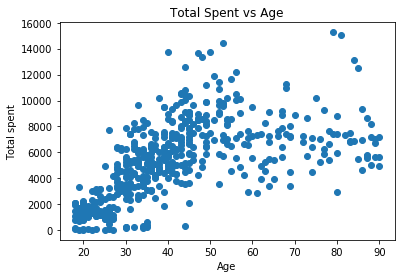

In [195]:
# age vs total spent. Age is continuous hence scatterplot
plt.scatter(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])
plt.xlabel("Age")
plt.ylabel("Total spent")
plt.title("Total Spent vs Age")

In [196]:
pearsonr(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])

(0.5760170677259264, 1.560821750278272e-45)

0.576 indicates a moderately strong. It indicates that as customers grow older they tend to spend more, which is quite normal in every society. As seen before age is highly correlated to income and therefore makes sense to see as age increases so does spending.

Text(0.5, 1.0, 'Total spent vs Experience score')

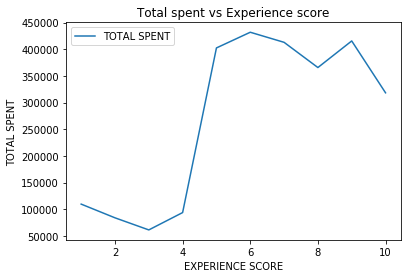

In [197]:
'''
experience score vs total spent. The data would be too messy to plot since we have 500 customers all with  
different experience scores therefore we sum up all that was spent by people who shared an experience score.
'''
spending_table = customer_all_view.groupby('EXPERIENCE SCORE').agg({'TOTAL SPENT': 'sum'})
spending_table.plot(kind = 'line')
plt.ylabel("TOTAL SPENT")
plt.title("Total spent vs Experience score")

It is very clear that customers who had a good experience at the store spent more at the store. This is shown by the steep hike after the 4th score.

Text(0.5, 1.0, 'Total spent vs Marital status ')

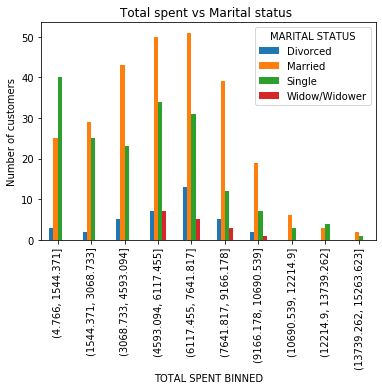

In [198]:
# marital status vs total spent
spending_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['MARITAL STATUS'])
spending_table.plot(kind = 'bar')
plt.ylabel("Number of customers")
plt.title("Total spent vs Marital status ")

Divorced customers are the least spenders, followed by widowed customers. Retailer X's best customers are either married or single.

Text(0.5, 1.0, 'Total spent vs Household size')

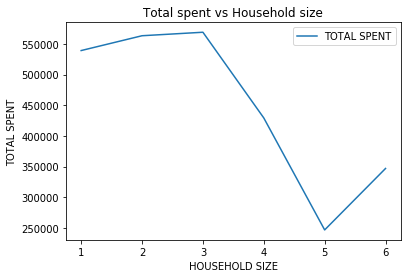

In [199]:
# household size vs total spent
spending_table = customer_all_view.groupby("HOUSEHOLD SIZE").agg({'TOTAL SPENT': 'sum'})
spending_table.plot(kind = 'line')
plt.ylabel("TOTAL SPENT")
plt.title("Total spent vs Household size")

Amount spent decreases with number of people in a household. Customer who come from households with 5 people spend the least, and customers from households with 3 people spend the most.

### CONCLUSION

**Factors affecting spending are:**
1. Household size
2. Marital status
3. Experience score
4. Age
5. Income


**Factors affecting loyalty are**
1. Total spent
2. Household size
3. Marital status
4. Experience score
5. Age

## Next we find the best model
### CLUSTERING
##### K-MEANS CLUSTERING

In [200]:
from sklearn.cluster import KMeans

In [201]:
# 1st grouping is according to income and total spent
cluster_input = customer_all_view[['INCOME', 'TOTAL SPENT']]
cluster_input.head()

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


In [202]:
# The retailer insists on 4 groups of customers so divide into 4 clusters.
kmeans_model = KMeans(n_clusters = 4)

In [203]:
# run the kmeans clustering algorithm on the clusters input:
cluster_output = kmeans_model.fit_predict(cluster_input)
cluster_output

array([2, 0, 3, 3, 1, 2, 3, 0, 0, 3, 1, 0, 3, 3, 3, 3, 3, 0, 2, 3, 0, 0,
       0, 1, 0, 0, 3, 1, 1, 2, 3, 1, 1, 0, 1, 1, 3, 0, 0, 1, 1, 3, 3, 3,
       2, 1, 1, 3, 2, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 3, 0, 2, 0, 2, 3,
       3, 0, 1, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3, 2, 3, 0, 2, 0, 3, 0, 2, 1,
       3, 1, 0, 2, 0, 0, 0, 3, 0, 1, 2, 0, 1, 1, 1, 1, 3, 0, 0, 1, 3, 1,
       1, 1, 3, 1, 0, 1, 2, 2, 3, 3, 1, 0, 0, 1, 3, 3, 0, 3, 1, 2, 3, 3,
       1, 3, 2, 0, 2, 2, 0, 3, 3, 1, 1, 1, 3, 0, 0, 1, 0, 3, 3, 0, 0, 0,
       3, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 3, 1, 2, 3, 1, 2, 1, 0, 0, 2, 1,
       2, 2, 0, 1, 2, 1, 3, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 3, 0, 1, 2, 2, 0, 1, 3, 2, 2, 2, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1,
       3, 1, 0, 1, 1, 3, 0, 1, 1, 3, 0, 3, 0, 3, 3, 1, 0, 2, 1, 1, 1, 3,
       3, 3, 3, 1, 0, 0, 2, 1, 3, 0, 1, 0, 1, 3, 1, 2, 0, 0, 1, 2, 1, 3,
       3, 2, 0, 3, 3, 0, 2, 3, 2, 1, 1, 1, 2, 3, 0, 0, 0, 3, 3, 3, 2, 3,
       0, 3, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1,

In [204]:
cluster_output = pd.DataFrame(cluster_output, columns = ['CLUSTER'])
cluster_output.tail()

,CLUSTER
495,0
496,0
497,0
498,1
499,3


In [205]:
# Now merge the first grouping with the segment:
cluster_in_out = pd.concat([cluster_input, cluster_output], axis =1)
cluster_in_out.tail()

,INCOME,TOTAL SPENT,CLUSTER
495,113125,8501.464,0
496,118108,9903.658,0
497,97353,6251.466,0
498,34424,20.010,1
499,75114,4182.032,3


In [206]:
# centroids
kmeans_model.cluster_centers_

array([[110254.62121212,   7744.12999242],
       [ 38530.82608696,   2260.43836232],
       [138471.625     ,   6972.91513636],
       [ 76337.14084507,   5260.48642958]])

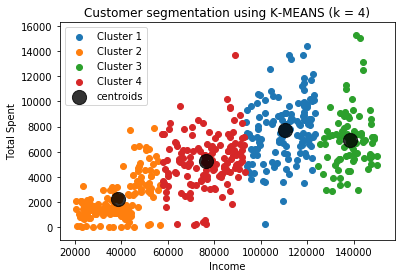

In [207]:
# plot the cluster results
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 0]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 0]['TOTAL SPENT'], label = 'Cluster 1')
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 1]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 1]['TOTAL SPENT'], label = 'Cluster 2')
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 2]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 2]['TOTAL SPENT'], label = 'Cluster 3')
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 3]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 3]['TOTAL SPENT'], label = 'Cluster 4')
# plot the centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], s = 200, c = 'black', alpha = 0.8, label = "centroids")

plt.title("Customer segmentation using K-MEANS (k = 4)")
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.legend()

Explore demographics of each cluster i.e. other factors that can give insight such as household size, martial status etc.

In [208]:
customer_demographics = pd.concat([customer_all_view, cluster_output], axis = 1)
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,AGE BINNED,TOTAL SPENT BINNED,CLUSTER
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,"(61.2, 68.4]","(6117.455, 7641.817]",2
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451,"(39.6, 46.8]","(4593.094, 6117.455]",0
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,"(39.6, 46.8]","(7641.817, 9166.178]",3
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,"(32.4, 39.6]","(4593.094, 6117.455]",3
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512,"(25.2, 32.4]","(4.766, 1544.371]",1


In [209]:
# Find the average age and household size of each cluster.
customer_demographics.groupby('CLUSTER').agg({'AGE':'mean', 'HOUSEHOLD SIZE': 'median'})

,AGE,HOUSEHOLD SIZE
CLUSTER,,
0,47.416667,3
1,24.449275,2
2,73.420455,2
3,35.661972,3


In [210]:
# check rate of enrollment per cluster:
def percent_loyalty(series):
    percent = ((series.value_counts()['enrolled']/series.count())*100).round(2)
    return percent

In [211]:
cluster_chars = customer_demographics.groupby("CLUSTER").agg({'AGE':'mean','INCOME': 'mean', 'HOUSEHOLD SIZE': 'median','LOYALTY GROUP': percent_loyalty})
cluster_chars

,AGE,INCOME,HOUSEHOLD SIZE,LOYALTY GROUP
CLUSTER,,,,
0,47.416667,110254.621212,3,66.67
1,24.449275,38530.826087,2,52.17
2,73.420455,138471.625000,2,65.91
3,35.661972,76337.140845,3,32.39


In [212]:
print("Cluster 0: made up of people averagely aged "+str(cluster_chars.iloc[0]['AGE'].round(2)) + " years old,\
live in a household of approximately "+str(int(cluster_chars.iloc[0]['HOUSEHOLD SIZE'])) + " people. " \
+str(cluster_chars.iloc[0]['LOYALTY GROUP'])+ "% of people in this cluster are are interested in the loyalty program.")
print("\n")
print("Cluster 1: made up of people averagely aged "+str(cluster_chars.iloc[1]['AGE'].round(2)) + " years old,\
live in a household of approximately "+str(int(cluster_chars.iloc[1]['HOUSEHOLD SIZE'])) + " people. " \
+str(cluster_chars.iloc[1]['LOYALTY GROUP'])+ "% of people in this cluster are are interested in the loyalty program.")
print("\n")
print("Cluster 2: made up of people averagely aged "+str(cluster_chars.iloc[2]['AGE'].round(2)) + " years old,\
live in a household of approximately "+str(int(cluster_chars.iloc[2]['HOUSEHOLD SIZE'])) + " people. " \
+str(cluster_chars.iloc[2]['LOYALTY GROUP'])+ "% of people in this cluster are are interested in the loyalty program.")
print("\n")
print("Cluster 3: made up of people averagely aged "+str(cluster_chars.iloc[3]['AGE'].round(2)) + " years old,\
live in a household of approximately "+str(int(cluster_chars.iloc[3]['HOUSEHOLD SIZE'])) + " people. " \
+str(cluster_chars.iloc[3]['LOYALTY GROUP'])+ "% of people in this cluster are are interested in the loyalty program.")



Cluster 0: made up of people averagely aged 47.42 years old,live in a household of approximately 3 people. 66.67% of people in this cluster are are interested in the loyalty program.


Cluster 1: made up of people averagely aged 24.45 years old,live in a household of approximately 2 people. 52.17% of people in this cluster are are interested in the loyalty program.


Cluster 2: made up of people averagely aged 73.42 years old,live in a household of approximately 2 people. 65.91% of people in this cluster are are interested in the loyalty program.


Cluster 3: made up of people averagely aged 35.66 years old,live in a household of approximately 3 people. 32.39% of people in this cluster are are interested in the loyalty program.


**Retailer X should lighlty market to clusters 3 and 1(ages 47.84 and 73.61) to increase the number of customers in the loyalty group. They should however look for better ways to market the loyalty program better to the clusters clusters 0 and 2(ages 34.31 and 24.93).** It can also be observed that the groups with a higher income are more interested in the loyalty program compared to those with a lower income.

Experience in the store does not give any meaningful insight.



## Hierarchical Clustering

In [213]:
from sklearn.cluster import AgglomerativeClustering

In [214]:
agglomerative_model = AgglomerativeClustering(n_clusters = 4)
agglomerative_model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [215]:
# same cluster input as before: income and total spent
h_cluster_output = agglomerative_model.fit_predict(cluster_input)
h_cluster_output

array([0, 3, 3, 3, 1, 0, 1, 0, 3, 1, 2, 3, 3, 3, 1, 3, 3, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 3, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1,
       3, 0, 2, 1, 1, 2, 1, 1, 0, 2, 3, 2, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1,
       3, 2, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 2, 2, 1, 2, 1, 3, 0, 2, 1, 1,
       2, 2, 1, 2, 3, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 1, 0, 1, 2, 0, 1, 3,
       1, 3, 0, 3, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 3, 2, 3, 1, 3, 0, 0, 0,
       3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1,
       0, 0, 3, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 2, 0, 0, 3, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 3, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 2, 2, 3, 3, 1, 0, 3, 3, 2, 0, 0, 1, 1, 2, 1,
       3, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 3, 2, 0, 1, 3,
       3, 0, 3, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 3, 3, 1, 3, 0, 1,
       0, 3, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 3, 2,

In [216]:
h_cluster_output = pd.DataFrame(h_cluster_output, columns = ['CLUSTER'])
h_cluster_output.head()

,CLUSTER
0,0
1,3
2,3
3,3
4,1


In [217]:
h_cluster_in_out = pd.concat([cluster_input, h_cluster_output], axis =1)
h_cluster_in_out.head()

,INCOME,TOTAL SPENT,CLUSTER
0,133498,6826.770,0
1,94475,5062.451,3
2,88610,8562.440,3
3,84313,5522.694,3
4,51498,213.512,1


In [218]:
# explore relationships per cluster
h_customer_demographics = pd.concat([customer_all_view, h_cluster_output], axis = 1)
h_customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,AGE BINNED,TOTAL SPENT BINNED,CLUSTER
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,"(61.2, 68.4]","(6117.455, 7641.817]",0
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451,"(39.6, 46.8]","(4593.094, 6117.455]",3
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,"(39.6, 46.8]","(7641.817, 9166.178]",3
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,"(32.4, 39.6]","(4593.094, 6117.455]",3
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512,"(25.2, 32.4]","(4.766, 1544.371]",1


In [219]:
h_customer_demographics.groupby('CLUSTER').agg({'AGE':'mean', 'HOUSEHOLD SIZE': 'median'})

,AGE,HOUSEHOLD SIZE
CLUSTER,,
0,61.382022,3
1,32.430769,3
2,22.620000,2
3,40.804348,4


In [220]:
h_customer_demographics.groupby('CLUSTER').agg({'AGE':'mean', 'HOUSEHOLD SIZE': 'median', 'LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
CLUSTER,,,
0,61.382022,3,70.22
1,32.430769,3,33.85
2,22.620000,2,58.00
3,40.804348,4,40.22


**Cluster 0:** made up of people averagely aged 61.38 years, have the highest income among the 4 clusters and live in a household with approximately 3 people. 70.22% of customers in this cluster are enrolled in the loyalty program.

**Cluster 1:** made up of customers averagely aged 32.43, live in a household with approximately 3 people and only 33.85% of customers in this cluster have enrolled in the loyalty program.

**Cluster 2:** made up customers averagely aged 22.62, have the least income among the 4 clusters and live in a household with approximately 2 people. 58% of people in this group are enrolled in the loyalty program.

**Cluster 3:** made up of people averagely aged 40.80, live in a household with approximately 4 people. 40.22% of customers in this cluster have enrolled in the loyalty program.

**From Hierarchical clustering, the results indicate that the loyalty program should be lightly marketed to clusters 0 and 2(ages 61.38 and 22.62), to increase their numbers because they are more receptive to the program. More should be invested in marketing to people in clusters 1 and 3(ages 32.43 and 40.80).**


The other factors affecting loyalty don't seem to give any meaningful insight, i.e. Marital status, total spent and experience score.

## Classification

After exploring various relationships and how they might affect loyalty and increased spending, create a model that can predict who is more likely to enroll into the loyalty program.

In [221]:
# Create a dataframe with the most relevant features:
classification_df = customer_all_view[['AGE', 'INCOME', 'TOTAL SPENT', 'EXPERIENCE SCORE', 'MARITAL STATUS', 'LOYALTY GROUP']]
classification_df.head()

,AGE,INCOME,TOTAL SPENT,EXPERIENCE SCORE,MARITAL STATUS,LOYALTY GROUP
0,64,133498,6826.770,5,Single,enrolled
1,42,94475,5062.451,9,Married,notenrolled
2,40,88610,8562.440,9,Married,enrolled
3,38,84313,5522.694,8,Single,enrolled
4,30,51498,213.512,3,Single,notenrolled


In [222]:
# separate input variables from target variable:
target_var = pd.DataFrame(classification_df['LOYALTY GROUP'])
target_var.head()

,LOYALTY GROUP
0,enrolled
1,notenrolled
2,enrolled
3,enrolled
4,notenrolled


In [223]:
classification_df = classification_df.drop(['LOYALTY GROUP'], axis = 1)
classification_df.head()

,AGE,INCOME,TOTAL SPENT,EXPERIENCE SCORE,MARITAL STATUS
0,64,133498,6826.770,5,Single
1,42,94475,5062.451,9,Married
2,40,88610,8562.440,9,Married
3,38,84313,5522.694,8,Single
4,30,51498,213.512,3,Single


In [224]:
# single = 0, married = 1, divorced = 2, widow/widower = 3

classification_df['MARITAL STATUS'] = classification_df['MARITAL STATUS'].map(lambda x: x.replace('Single', '0'))
classification_df['MARITAL STATUS'] = classification_df['MARITAL STATUS'].map(lambda x: x.replace('Married', '1'))
classification_df['MARITAL STATUS'] = classification_df['MARITAL STATUS'].map(lambda x: x.replace('Divorced', '2'))
classification_df['MARITAL STATUS'] = classification_df['MARITAL STATUS'].map(lambda x: x.replace('Widow/Widower', '3'))
classification_df['MARITAL STATUS'][151:160]

151    1
152    1
153    1
154    0
155    3
156    2
157    1
158    1
159    0
Name: MARITAL STATUS, dtype: object

In [225]:
classification_df.head()

,AGE,INCOME,TOTAL SPENT,EXPERIENCE SCORE,MARITAL STATUS
0,64,133498,6826.770,5,0
1,42,94475,5062.451,9,1
2,40,88610,8562.440,9,1
3,38,84313,5522.694,8,0
4,30,51498,213.512,3,0


In [226]:
# classification df has to be scaled because of the ranges between income, total spent, age and the rest.
from sklearn import preprocessing

In [227]:
classification_df_column_names = classification_df.columns.values
classification_df_column_names

array(['AGE', 'INCOME', 'TOTAL SPENT', 'EXPERIENCE SCORE',
       'MARITAL STATUS'], dtype=object)

In [228]:
classification_df = preprocessing.minmax_scale(classification_df)
classification_df

array([[0.63888889, 0.8728178 , 0.44653193, 0.44444444, 0.        ],
       [0.33333333, 0.57204628, 0.33079041, 0.88888889, 0.33333333],
       [0.30555556, 0.52684153, 0.56039405, 0.88888889, 0.33333333],
       ...,
       [0.33333333, 0.59422859, 0.40879128, 0.77777778, 0.33333333],
       [0.05555556, 0.1092005 , 0.        , 0.        , 0.        ],
       [0.22222222, 0.4228205 , 0.27303383, 0.88888889, 0.66666667]])

In [229]:
classification_df = pd.DataFrame(classification_df, columns = classification_df_column_names)
classification_df.head()

,AGE,INCOME,TOTAL SPENT,EXPERIENCE SCORE,MARITAL STATUS
0,0.638889,0.872818,0.446532,0.444444,0.000000
1,0.333333,0.572046,0.330790,0.888889,0.333333
2,0.305556,0.526842,0.560394,0.888889,0.333333
3,0.277778,0.493722,0.360983,0.777778,0.000000
4,0.166667,0.240799,0.012694,0.222222,0.000000


In [230]:
# merge scaled data with scaled data.
classification_df = pd.concat([classification_df, target_var], axis = 1)
classification_df.head()

,AGE,INCOME,TOTAL SPENT,EXPERIENCE SCORE,MARITAL STATUS,LOYALTY GROUP
0,0.638889,0.872818,0.446532,0.444444,0.000000,enrolled
1,0.333333,0.572046,0.330790,0.888889,0.333333,notenrolled
2,0.305556,0.526842,0.560394,0.888889,0.333333,enrolled
3,0.277778,0.493722,0.360983,0.777778,0.000000,enrolled
4,0.166667,0.240799,0.012694,0.222222,0.000000,notenrolled


In [231]:
# divide your data into training and testing splits
from sklearn.model_selection import train_test_split

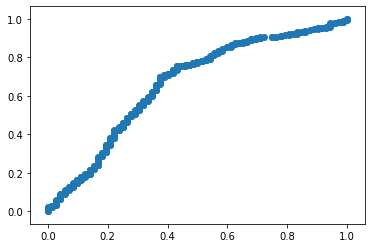

In [232]:
plt.scatter(classification_df['AGE'], classification_df['INCOME'])

In [233]:
pearsonr(classification_df['AGE'], classification_df['INCOME'])

(0.9417989049786017, 6.452902105194393e-238)

Age and Income are highly correlated, therefore we can omit age from the train test split, it wouldn't change the result instead it would increase the speed of the algorithm

In [234]:
X_train,X_test,Y_train,Y_test = train_test_split(classification_df[['INCOME','TOTAL SPENT','EXPERIENCE \
SCORE', 'MARITAL STATUS']],classification_df[['LOYALTY GROUP']], test_size = 0.2, random_state = 42)

### Training and testing using K Nearest Neighbour.

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
# create an instance of the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 8)

In [237]:
import numpy as np
knn_classifier.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [238]:
knn_predicted = knn_classifier.predict(X_test)

In [239]:
# test accuracy of KNN model by comparing to actual values
from sklearn import metrics
acc = metrics.accuracy_score(Y_test, knn_predicted)
print("Accuracy = " + str(acc*100) + "%")
print(metrics.classification_report(Y_test, knn_predicted))

Accuracy = 71.0%
              precision    recall  f1-score   support

    enrolled       0.65      0.94      0.77        51
 notenrolled       0.88      0.47      0.61        49

    accuracy                           0.71       100
   macro avg       0.77      0.71      0.69       100
weighted avg       0.76      0.71      0.69       100



### Training and testing using Decision trees

In [240]:
from sklearn.tree import DecisionTreeClassifier 

In [241]:
# create an instance of the algorithm using 
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)

In [242]:
dt_classifier.fit(X_train, Y_train)
dt_predicted = dt_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, dt_predicted)
print("Accuracy = "+ str((acc*100).round(2)) + "%.")
print(metrics.classification_report(Y_test, dt_predicted))

Accuracy = 72.0%.
              precision    recall  f1-score   support

    enrolled       0.74      0.69      0.71        51
 notenrolled       0.70      0.76      0.73        49

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



The decision tree classifier is more accurate compared to the KNN classifier by 1%. 

In [243]:
# the higher the feature importance the more important the value:[income, total spent, experience score, marital status]
dt_classifier.feature_importances_

array([0.26733614, 0.41834232, 0.25838489, 0.05593664])

total spent is the most important feature and marital status is the least important., do away with marital status observe if model accuracy will improve.

In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(classification_df[['INCOME','TOTAL SPENT','EXPERIENCE \
SCORE']], classification_df[['LOYALTY GROUP']], test_size = 0.2, random_state =42)

In [245]:
knn_classifier.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [246]:
knn_predicted = knn_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, knn_predicted)
print("Accuracy = "+ str((acc*100).round(2)) + '%')

Accuracy = 79.0%


In [247]:
dt_classifier.fit(X_train, Y_train)
dt_predicted = dt_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, dt_predicted)
print("Accuracy = " + str(acc*100) + '%')

Accuracy = 75.0%


By removing the marital status, the model accuracy has improved! The KNN classifier has improved by 8% and Decision tree classifier by 3%.

In [248]:
# features: [income, total spent, experience score]. Experience score is now the least important.
dt_classifier.feature_importances_

array([0.33658323, 0.39545388, 0.26796289])

### Model evaluation using K-Fold cross validation

In [249]:
from sklearn.model_selection import KFold

In [250]:
# create a training and testing function
def train_test(model, train_data, train_labels, test_data, test_labels):
    model.fit(train_data, train_labels)
    predicted = model.predict(test_data)
    acc = metrics.accuracy_score(test_labels, predicted)
    print("Accuracy = " + str(acc*100) + "%")
    return acc

In [251]:
# set iteration to 10 to have 450 training samples and 50 testing.
kf = KFold(n_splits = 10)

In [252]:
# training and testing the decision tree model
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
accuracy_list = []

In [253]:
# test each fold and get average accuracy
for train_index, test_index in kf.split(classification_df[['INCOME', 'TOTAL SPENT', 'EXPERIENCE SCORE']]):
    X = classification_df[['INCOME', 'TOTAL SPENT', 'EXPERIENCE SCORE']]
    Y = classification_df[['LOYALTY GROUP']]
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    accuracy = train_test(dt_classifier, X_train,Y_train,X_test,Y_test)
    accuracy_list.append(accuracy)
print("Overall accuracy = " + str(((sum(accuracy_list)/len(accuracy_list))*100).round(2)) + "%")

Accuracy = 78.0%
Accuracy = 76.0%
Accuracy = 74.0%
Accuracy = 68.0%
Accuracy = 72.0%
Accuracy = 82.0%
Accuracy = 70.0%
Accuracy = 70.0%
Accuracy = 72.0%
Accuracy = 78.0%
Overall accuracy = 74.0%


In [254]:
# training and testing the knn model.
kn_accuracy_list = []

In [255]:
for k_neighbours in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors = k_neighbours)
    kfold_accuracy_list = []
    for train_index, test_index in kf.split(classification_df[['INCOME', 'TOTAL SPENT', 'EXPERIENCE SCORE']]):
        X = classification_df[['INCOME','TOTAL SPENT', 'EXPERIENCE SCORE']]
        Y = classification_df[['LOYALTY GROUP']]
        X_train,X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train,Y_test = Y.iloc[train_index], Y.iloc[test_index]
        accuracy = train_test(knn_classifier, X_train,np.ravel(Y_train),X_test,Y_test)
        kfold_accuracy_list.append(accuracy)
    kn_accuracy_list.append(sum(kfold_accuracy_list)/len(kfold_accuracy_list)*100)
    print("Overall accuracy for k_neighbours at position ", k_neighbours, " = ", kn_accuracy_list[k_neighbours - 1],"%")

Accuracy = 64.0%
Accuracy = 64.0%
Accuracy = 66.0%
Accuracy = 64.0%
Accuracy = 82.0%
Accuracy = 68.0%
Accuracy = 70.0%
Accuracy = 64.0%
Accuracy = 76.0%
Accuracy = 68.0%
Overall accuracy for k_neighbours at position  1  =  68.6 %
Accuracy = 74.0%
Accuracy = 60.0%
Accuracy = 72.0%
Accuracy = 74.0%
Accuracy = 74.0%
Accuracy = 78.0%
Accuracy = 70.0%
Accuracy = 72.0%
Accuracy = 82.0%
Accuracy = 76.0%
Overall accuracy for k_neighbours at position  2  =  73.2 %
Accuracy = 72.0%
Accuracy = 64.0%
Accuracy = 68.0%
Accuracy = 70.0%
Accuracy = 78.0%
Accuracy = 78.0%
Accuracy = 70.0%
Accuracy = 70.0%
Accuracy = 76.0%
Accuracy = 76.0%
Overall accuracy for k_neighbours at position  3  =  72.2 %
Accuracy = 82.0%
Accuracy = 66.0%
Accuracy = 72.0%
Accuracy = 74.0%
Accuracy = 80.0%
Accuracy = 82.0%
Accuracy = 70.0%
Accuracy = 76.0%
Accuracy = 78.0%
Accuracy = 78.0%
Overall accuracy for k_neighbours at position  4  =  75.80000000000001 %
Accuracy = 78.0%
Accuracy = 64.0%
Accuracy = 80.0%
Accuracy = 74.0%

**position 10 has the  highest overall accuracy at 77.6%.**

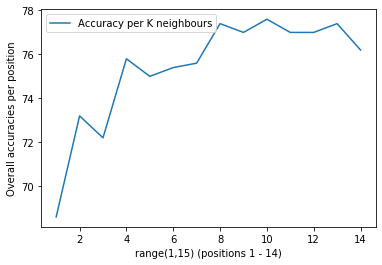

In [256]:
# confirming optimal fold by plotting.
plt.plot(range(1,15), kn_accuracy_list)
plt.xlabel("range(1,15) (positions 1 - 14)")
plt.ylabel("Overall accuracies per position")
plt.legend(['Accuracy per K neighbours'], loc = "upper left")

10 is still the optimal value for k_neighbours i.e. 10_neighbours



### Compare accuracies for the two models using different input features


**KNN accuracy with income, experience score, total spent and gender as input features**

In [257]:
classification_df = customer_all_view[['INCOME', 'EXPERIENCE SCORE', 'TOTAL SPENT', 'GENDER']]

In [258]:
classification_df_column_names = classification_df.columns.values
classification_df_column_names

array(['INCOME', 'EXPERIENCE SCORE', 'TOTAL SPENT', 'GENDER'],
      dtype=object)

In [259]:
classification_df = preprocessing.minmax_scale(classification_df)

In [260]:
classification_df = pd.DataFrame(classification_df, columns=classification_df_column_names)

In [261]:
classification_df = pd.concat([classification_df, target_var], axis = 1)
classification_df.head()

,INCOME,EXPERIENCE SCORE,TOTAL SPENT,GENDER,LOYALTY GROUP
0,0.872818,0.444444,0.446532,0.0,enrolled
1,0.572046,0.888889,0.330790,0.0,notenrolled
2,0.526842,0.888889,0.560394,0.0,enrolled
3,0.493722,0.777778,0.360983,0.0,enrolled
4,0.240799,0.222222,0.012694,0.0,notenrolled


In [262]:
X_train,X_test,Y_train,Y_test = train_test_split(classification_df[['INCOME','EXPERIENCE SCORE', 'TOTAL \
SPENT','GENDER']], classification_df[['LOYALTY GROUP']], test_size = 0.2, random_state = 42)

In [263]:
# 10 neighbours since 10 was the optimal value in the validation. 
knn_classifier = KNeighborsClassifier(n_neighbors=10)

In [264]:
knn_classifier.fit(X_train,np.ravel(Y_train))
knn_predicted = knn_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, knn_predicted)
print("Accuracy = " + str(acc*100) + "%")

Accuracy = 73.0%


**Decision Tree accuracy with same input features**

In [265]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train,Y_train)
dt_predicted = dt_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, dt_predicted)
print("Accuracy = " +str(acc*100) + "%")

Accuracy = 74.0%


Adding gender decreases accuracy for both.

**new features: experience, age, total spent**

In [266]:
classification_df = customer_all_view[['EXPERIENCE SCORE', 'AGE', 'TOTAL SPENT']]
classification_df_column_names = classification_df.columns.values

In [267]:
classification_df = preprocessing.minmax_scale(classification_df)
classification_df = pd.DataFrame(classification_df, columns=classification_df_column_names)

In [268]:
classification_df = pd.concat([classification_df, target_var], axis = 1)

In [269]:
X_train,X_test,Y_train,Y_test = train_test_split(classification_df[['EXPERIENCE SCORE', 'AGE', 'TOTAL \
SPENT']], classification_df[['LOYALTY GROUP']], test_size = 0.2, random_state = 42)

In [270]:
classification_df.head()

,EXPERIENCE SCORE,AGE,TOTAL SPENT,LOYALTY GROUP
0,0.444444,0.638889,0.446532,enrolled
1,0.888889,0.333333,0.330790,notenrolled
2,0.888889,0.305556,0.560394,enrolled
3,0.777778,0.277778,0.360983,enrolled
4,0.222222,0.166667,0.012694,notenrolled


In [271]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train,np.ravel(Y_train))
knn_predicted = knn_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, knn_predicted)
print("Accuracy = " + str(acc*100) + "%")

Accuracy = 77.0%


In [272]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt_classifier.fit(X_train,Y_train)
dt_predicted = dt_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, dt_predicted)
print("Accuracy = ", str(acc*100), "%")

Accuracy =  75.0 %


**New features: income and total spent**

In [273]:
classification_df = customer_all_view[['INCOME', 'TOTAL SPENT']]
classification_df_column_names = classification_df.columns.values
classification_df = preprocessing.minmax_scale(classification_df)
classification_df = pd.DataFrame(classification_df, columns=classification_df_column_names)
classification_df = pd.concat([classification_df, target_var], axis = 1)
classification_df.head()

,INCOME,TOTAL SPENT,LOYALTY GROUP
0,0.872818,0.446532,enrolled
1,0.572046,0.330790,notenrolled
2,0.526842,0.560394,enrolled
3,0.493722,0.360983,enrolled
4,0.240799,0.012694,notenrolled


In [274]:
X_train,X_test,Y_train,Y_test = train_test_split(classification_df[['INCOME', 'TOTAL SPENT']],\
classification_df['LOYALTY GROUP'], test_size = 0.2, random_state = 42)

In [275]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train,Y_train)
knn_predicted = knn_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, knn_predicted)
print("Accuracy_score = ", str(acc*100), "%")

Accuracy_score =  78.0 %


In [276]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train,Y_train)
dt_predicted = dt_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, dt_predicted)
print("Accuracy = ", str(acc*100), '%')

Accuracy =  65.0 %


**New features: experience score, income, total spent**

These are the original features but now test with k= 10

In [277]:
classification_df = customer_all_view[['INCOME', 'EXPERIENCE SCORE', 'TOTAL SPENT']]
classification_df_column_names = classification_df.columns.values
classification_df = preprocessing.minmax_scale(classification_df)
classification_df = pd.DataFrame(classification_df, columns=classification_df_column_names)
classification_df = pd.concat([classification_df, target_var], axis = 1)

In [278]:
X_train,X_test,Y_train,Y_test = train_test_split(classification_df[['INCOME', 'EXPERIENCE SCORE', 'TOTAL \
SPENT']], classification_df[['LOYALTY GROUP']], test_size = 0.2, random_state = 42)

In [279]:
knn_classifier = KNeighborsClassifier(n_neighbors= 10)
knn_classifier.fit(X_train,np.ravel(Y_train))
knn_predicted = knn_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, knn_predicted)
print("Accuracy = ", str(acc*100), "%")

Accuracy =  78.0 %


In [280]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, Y_train)
dt_predicted = dt_classifier.predict(X_test)
acc = metrics.accuracy_score(Y_test, dt_predicted)
print("Accuracy = ", str(100*acc), "%")

Accuracy =  75.0 %


Using KNN and DecisionTrees as my models, the summary of their behaviours are as follows:

| Input Features | KNN Accuracy | Decision Tree Accuracy |
| -------------- | ------------ | ---------------------- |
| Income, Experience score, Total spent, Gender | 73% | 74% |
| Income, Total spent, Experience score | 78% | 75% |
| Experience score, Age, Total spent | 77% | 75% |
| Income, Total spent | 78% | 65% |
| Average accuracy | 76.5% | 72.25% |



KNN, between the two tested models is the preferred model since it is always more accurate compared to Decision Tree. The best features to use are [Income, Total spent] and [Income, Total spent, Experience score] using KNN; they both are of 78% accuracy which is the highest score. It is worth noting, however, that when using n_neighbors = 8, for the same input features,  accuracy for KNN = 79% and Decision Tree = 75%



### Using Linear Regression and total spent as target variable

In [281]:
features = ['GENDER', 'AGE','INCOME','EXPERIENCE SCORE', 'LOYALTY GROUP', 'HOUSEHOLD SIZE', 'MARITAL STATUS']
lr_input = customer_all_view[features]
lr_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,enrolled,4,Single
1,0,42,94475,9,notenrolled,6,Married
2,0,40,88610,9,enrolled,5,Married
3,0,38,84313,8,enrolled,1,Single
4,0,30,51498,3,notenrolled,1,Single


In [282]:
pd.get_dummies(lr_input['MARITAL STATUS']).head()

,Divorced,Married,Single,Widow/Widower
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [283]:
pd.options.mode.chained_assignment = None
lr_input['LOYALTY GROUP'] = pd.get_dummies(lr_input['LOYALTY GROUP'])
lr_input = pd.get_dummies(lr_input)
lr_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0,64,133498,5,1,4,0,0,1,0
1,0,42,94475,9,0,6,0,1,0,0
2,0,40,88610,9,1,5,0,1,0,0
3,0,38,84313,8,1,1,0,0,1,0
4,0,30,51498,3,0,1,0,0,1,0


In [284]:
# scale
lr_input_column_names = lr_input.columns.values
lr_input = preprocessing.minmax_scale(lr_input)
lr_input = pd.DataFrame(lr_input, columns = lr_input_column_names)
lr_input.head()

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0.0,0.638889,0.872818,0.444444,1.0,0.6,0.0,0.0,1.0,0.0
1,0.0,0.333333,0.572046,0.888889,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.305556,0.526842,0.888889,1.0,0.8,0.0,1.0,0.0,0.0
3,0.0,0.277778,0.493722,0.777778,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.166667,0.240799,0.222222,0.0,0.0,0.0,0.0,1.0,0.0


In [285]:
from sklearn.linear_model import LinearRegression

In [286]:
X_train,X_test,Y_train,Y_test = train_test_split(lr_input, customer_all_view['TOTAL SPENT'],\
test_size = 0.2, random_state = 42)

In [287]:
# instantiate the model
regr = LinearRegression()

In [288]:
# train the model:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
lr_predicted = regr.predict(X_test)

In [290]:
# get coefficients, they should be in the order of features.
print("Coefficients = \n ", regr.coef_)

Coefficients = 
  [   35.58494877 -7076.18001534 12403.0952701    505.84578936
  1566.48092344  1040.19923196   377.33573376   -82.02665324
   -34.57620088  -260.73287964]


In [291]:
table1 = pd.DataFrame(lr_input_column_names, columns = ['Predictor Variables'])
table2 = pd.DataFrame(regr.coef_, columns = ['Coefficients'])
predictor_coeffs = pd.concat([table1, table2], axis = 1)
predictor_coeffs

,Predictor Variables,Coefficients
0,GENDER,35.584949
1,AGE,-7076.180015
2,INCOME,12403.095270
3,EXPERIENCE SCORE,505.845789
4,LOYALTY GROUP,1566.480923
5,HOUSEHOLD SIZE,1040.199232
6,MARITAL STATUS_Divorced,377.335734
7,MARITAL STATUS_Married,-82.026653
8,MARITAL STATUS_Single,-34.576201
9,MARITAL STATUS_Widow/Widower,-260.732880


positive values indicate a positive correlation with the target variable that is total spent. Negative values indicate the opposite. 

**The magnitude of a predictor variable is measured by the absolute value of its regression coefficient. High value = high importance.**

In [292]:
# measure importance/magnitude
abs(predictor_coeffs['Coefficients']).sort_values(ascending = False)

2    12403.095270
1     7076.180015
4     1566.480923
5     1040.199232
3      505.845789
6      377.335734
9      260.732880
7       82.026653
0       35.584949
8       34.576201
Name: Coefficients, dtype: float64

Order of importance = **Income** > Age > Loyalty > Household size > Experience > Divorced > Widowed > Married > Gender > Single

In [293]:
# get constant/intercept that satisfies the equation y = mx + c.
# c = constant, m = coefficients, x = predictors, y = target variable
regr.intercept_

-38.16947521865768

In [294]:
# evaluate model using mean squared error
from sklearn.metrics import mean_squared_error

In [295]:
mse = mean_squared_error(Y_test, lr_predicted)

In [296]:
np.sqrt(mse)

1778.7913411697505

This means that the linear regression model is able to predict total spending with an average error of 1778.79 dollars.

In [297]:
# Using linear regression on the factors established affect total spending:Income, experience, household size
lr_input = customer_all_view[['INCOME', 'EXPERIENCE SCORE', 'HOUSEHOLD SIZE']]
lr_input_column_names = lr_input.columns.values
lr_input = preprocessing.minmax_scale(lr_input)
lr_input = pd.DataFrame(lr_input, columns = lr_input_column_names)

In [298]:
X_train,X_test,Y_train,Y_test = train_test_split(lr_input, customer_all_view['TOTAL SPENT'], test_size = 0.2, random_state = 42)

In [299]:
regr.fit(X_train,Y_train)
lr_predicted = regr.predict(X_test)
regr.coef_

array([6974.67976266, 1302.76267423, 1456.38393823])

In [300]:
mse = mean_squared_error(Y_test, lr_predicted)
np.sqrt(mse)

1910.953755091372

Using Income, Experience score and household size has a larger error compared to using all the columns as input features.

In [301]:
lr_input = customer_all_view[['INCOME','AGE','LOYALTY GROUP', 'HOUSEHOLD SIZE', 'EXPERIENCE SCORE']]
lr_input_column_names = lr_input.columns.values
lr_input['LOYALTY GROUP'] = pd.get_dummies(lr_input['LOYALTY GROUP'])
lr_input = preprocessing.minmax_scale(lr_input)
lr_input = pd.DataFrame(lr_input, columns = lr_input_column_names)

In [302]:
X_train,X_test,Y_train,Y_test = train_test_split(lr_input, customer_all_view['TOTAL SPENT'], test_size = 0.2, random_state = 42)

In [303]:
regr.fit(X_train,Y_train)
lr_predicted = regr.predict(X_test)
regr.coef_

array([12603.96588313, -7303.9974324 ,  1554.3041761 ,   922.7433108 ,
         490.22335566])

In [304]:
mse = mean_squared_error(Y_test, lr_predicted)
np.sqrt(mse)

1777.1751396441978

In [305]:
1778.79-1777.18

1.6099999999999

In [306]:
# using income only:
lr_input = customer_all_view[['INCOME']]
lr_input = preprocessing.minmax_scale(lr_input)
lr_input = pd.DataFrame(lr_input, columns = ['INCOME'])

In [307]:
X_train,X_test,Y_train,Y_test = train_test_split(lr_input, customer_all_view['TOTAL SPENT'], test_size = 0.2, random_state = 42)

In [308]:
regr.fit(X_train,Y_train)
lr_predicted = regr.predict(X_test)
mse = mean_squared_error(Y_test, lr_predicted)
np.sqrt(mse)

2033.2035318781275

The best model is the one whose predictors are [INCOME','AGE','LOYALTY GROUP', 'HOUSEHOLD SIZE', 'EXPERIENCE SCORE]. It is better than the initial one by only **1.61**. It is able to predict with an average error of 1777.18 which is the least squared error.